C:\Users\91997\anaconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	max    
0  	20    	0.985045	1.81862
1  	15    	1.2889  	1.99607
2  	16    	1.46706 	1.99607
3  	15    	1.54966 	2.03021
4  	16    	1.37301 	1.99607
5  	14    	1.32566 	1.99607
6  	11    	1.59632 	1.99607
7  	20    	1.83176 	1.99607
8  	16    	1.85938 	1.99607
9  	15    	1.97946 	1.99607
10 	16    	1.99607 	1.99607
11 	12    	1.86216 	1.99607
12 	18    	1.99607 	1.99607
13 	14    	1.99029 	1.99607
14 	13    	1.88981 	1.99607
15 	14    	1.88883 	1.99607
16 	15    	1.90883 	1.99607
17 	16    	1.80327 	1.99607
18 	16    	1.99607 	1.99607
19 	16    	1.86561 	1.99607
20 	12    	1.99607 	1.99607

🏆 Best solution: x = 1.0572, fitness = 2.0302


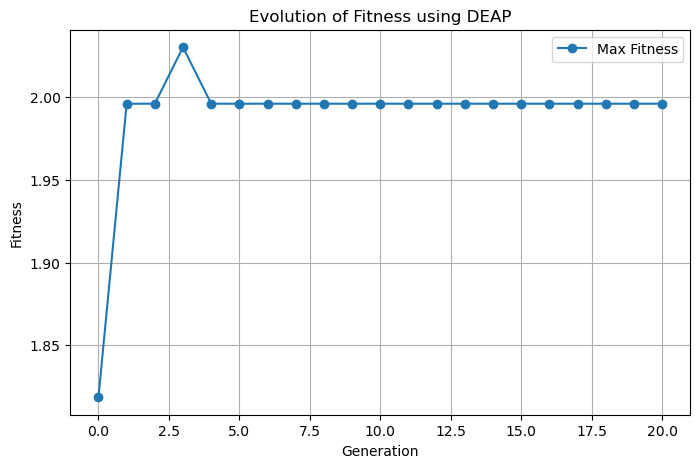

In [14]:
# Install DEAP if not already installed (uncomment if needed)
# !pip install deap

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Define fitness function
def fitness_func(individual):
    x = individual[0]
    return x * np.sin(10 * np.pi * x) + 1,  # Return as tuple

# Create types for fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Toolbox setup
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Genetic Algorithm Runner
def run_deap():
    pop = toolbox.population(n=20)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(
        pop, toolbox, 
        cxpb=0.7, mutpb=0.2, ngen=20, 
        stats=stats, halloffame=hof, verbose=True
    )

    print(f"\n🏆 Best solution: x = {hof[0][0]:.4f}, fitness = {hof[0].fitness.values[0]:.4f}")
    
    # Plot fitness over generations
    gen = log.select("gen")
    fit_max = log.select("max")
    
    plt.figure(figsize=(8, 5))
    plt.plot(gen, fit_max, label="Max Fitness", marker='o')
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Evolution of Fitness using DEAP")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run the GA
run_deap()

